## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Из 13 колонок 13 имеют числовой тип, а пропущенных значений нет.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV # с помощью него тоже можно использовать нескольо гиперпараметров
from sklearn.metrics import accuracy_score

Масштабирую все признаки:

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Теперь выделю только alcohol и magnesium, в 1 задании можно было посмотреть, что они имеют индекс 0 и 4 соответственно. Далее обучу модель 6 раз.

In [96]:
n_neighborses = [1, 3, 5, 10, 15, 25]
classifiers = dict()
x_features_train = x_train[:, [0, 4]]
x_features_test = x_test[:, [0, 4]]

print("{:<5}{:<8}{:<8}".format('NN','Train','Test'))
for n in n_neighborses:
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(x_features_train, y_train)

    accuracy_train = round(accuracy_score(y_train, knn.predict(x_features_train)), 2)
    accuracy_test = round(accuracy_score(y_test, knn.predict(x_features_test)), 2)
    
    classifiers[n] = knn
    print("{:<8}{:<8}{:<8}".format(n, accuracy_train, accuracy_test))


NN   Train   Test    
1       0.99    0.67    
3       0.84    0.65    
5       0.81    0.69    
10      0.81    0.7     
15      0.78    0.69    
25      0.73    0.69    


Лучшим оказался, что и ожидалось, n_neighbors = 1, но это на тренировочной части. На тестовой части лучшим оказался n_neighbors=10

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [94]:
!pip install mlxtend

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'd:\\programs\\anaconda\\lib\\site-packages\\numpy-1.21.2.dist-info\\METADATA'



Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [98]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [3]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

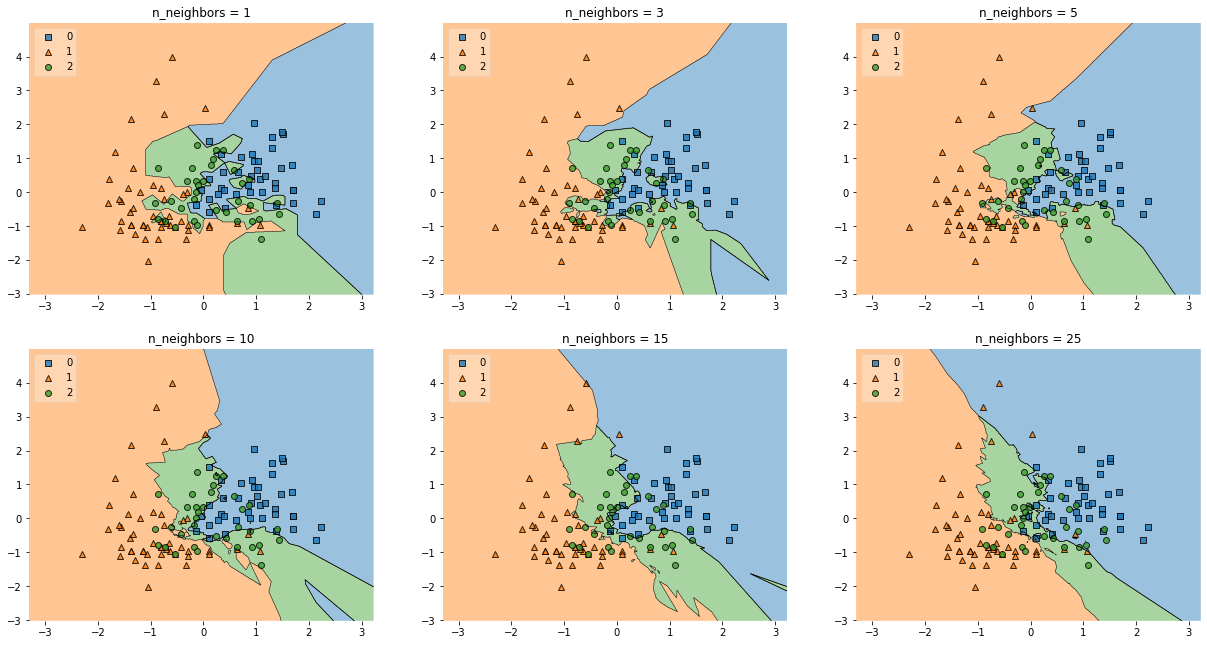

In [125]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(21,11))

for i, axis in zip(classifiers, list(itertools.product([0, 1, 2], repeat=2))[:-3]):
    ax = plt.subplot(gs[axis[0], axis[1]])
    fig = plot_decision_regions(x_train[:, [0, 4]], y_train, clf=classifiers[i], legend=2)
    plt.title(f"n_neighbors = {i}")

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Так как мы основываемся на результате на тестовых данных, то самый оптимальный вариант исходя из точности это количество соседей 10.
На графике можно посмотреть, как с ростом соседей классы разделяются более размыто. На 1 моделе понятно, что она переобучилась, уж слишком детально обрисованы границы и какие-то отдельные островки в классах. С 10 уже получше, зеленые входят в красные, а вот в голубом можно заметить зеленые объекты. У графика с 25 соседями более гладкие границы.

Мой выбор падет на 15 соседей, так как точность на тестовой части отличается от максимальной всего на 0.01, а график не так "круто" режет классы, но и не такой гладкий, как у 25 соседях.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

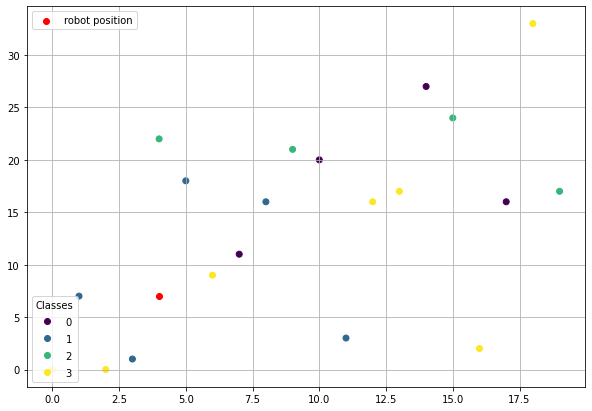

In [4]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])

        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)

        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        landmark = np.random.binomial(1, 0.2) # вероятность повернуться направо
        moving_class = 0 if landmark else  self.knn.predict([self.trajectory[-1]])[0]

        self.trajectory = np.vstack((self.trajectory, [self.trajectory[-1] + self.mapping[moving_class]]))
        # return self.trajectory[-1]

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [94]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

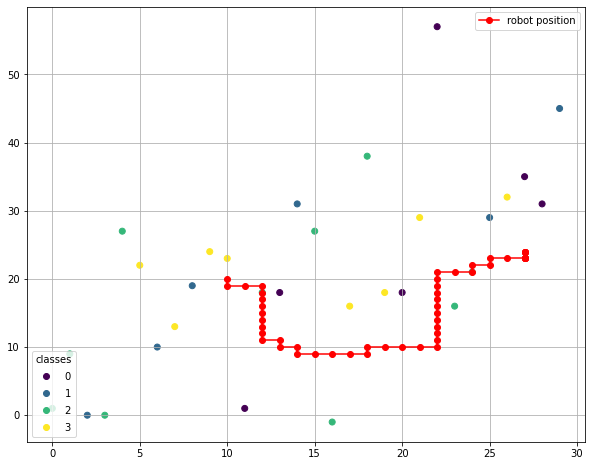

In [95]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

In [106]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = [1, 3],
                       initial_position = np.array([10, 20])):

    gs = gridspec.GridSpec(2, 3)

    fig = plt.figure(figsize=(21,11))

    x = np.arange(30)

    np.random.seed(12345)
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    classes = np.random.randint(0, 4, size = len(x))
    
    for k, axis in zip(neighbors, list(itertools.product([0, 1, 2], repeat=2))[:-3]):
        ax = plt.subplot(gs[axis[0], axis[1]])

        robot = MobileRobot(k, initial_position, landmarks, classes)
        
        for n in range(n_movements):
            robot.move()
        
        scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
        legend1 = ax.legend(*scatter.legend_elements(),
                            loc="lower left", title="classes")
        ax.add_artist(legend1)
        
        traj = robot.trajectory
        
        ax.plot(traj[:, 0], traj[:, 1], 
                c = 'r', marker = 'o', label = 'robot position')
        plt.title(f"n_neighbors = {k}")

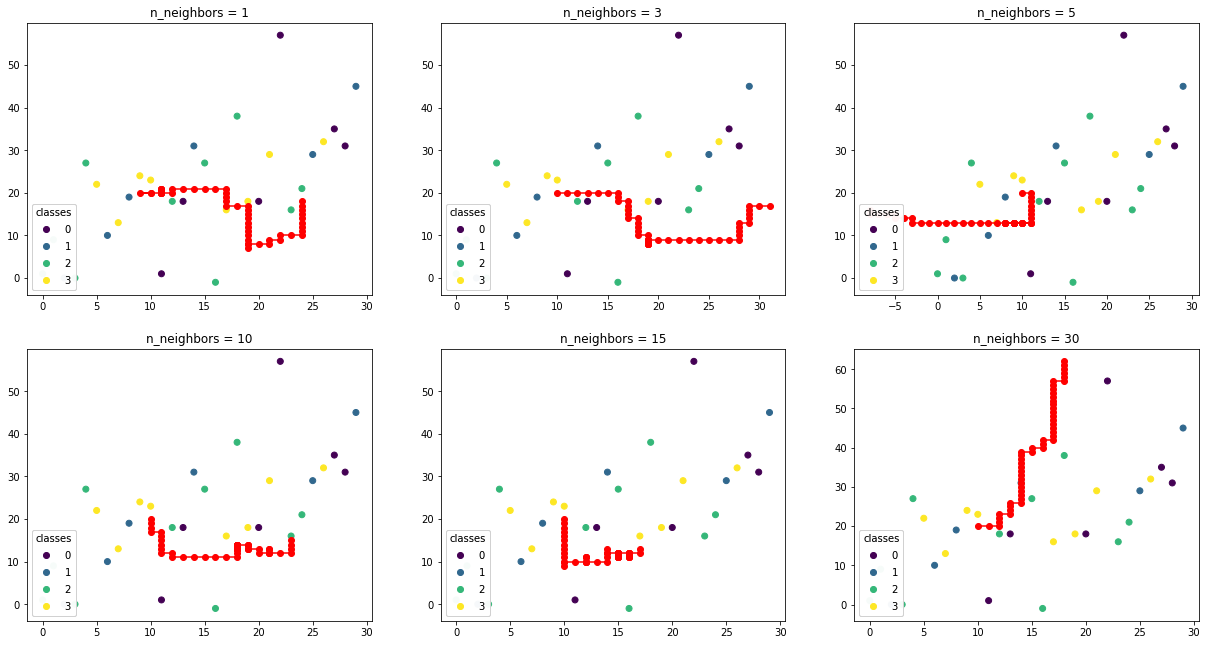

In [108]:
neighbors = [1, 3, 5, 10, 15, 30]

conduct_experiment(x, mean = 3, std = 10, k = neighbors, n_movements = 50)

Можно заметить, что при количестве соседей 30(я специально выбрала столько, сколько меток), можно заметить в основном ход наверх, так как преимущественно зеленых(2) точек больше. А ход вправо это та самая случайность 0.2. Примерно в 80% случаев робот ходит только наверх.
Когда количество соседей меньше, то шаг становится менее ожидаемым.

Если бы классы назначались осмысленно, то можно было бы предсказать ход робота. То есть, если мы делаем точки осмысленно, то скорее всего, наш робот будет ходить по маршруту, который нам нужен.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [190]:
import pandas as pd
import seaborn as sns

In [191]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Пропущенных значений нет

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [193]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [194]:
len(data['Unnamed: 0'].unique()) == len(data)

True

In [195]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

<AxesSubplot:>

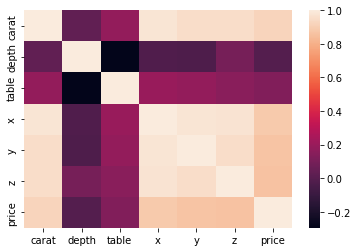

In [196]:
num_columns = list(data.columns[(data.dtypes == 'float64').values])
target = ['price']
sns.heatmap(data[num_columns + target].corr())

Больше всех коррелирует carat, меньше всех depth.
Так же можно заметить, что некоторые признаки очень сильно коррелируют между собой

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [197]:
cat_columns = list(data.columns[(data.dtypes == 'object').values])
cat_columns

['cut', 'color', 'clarity']

In [198]:
from sklearn.preprocessing import OneHotEncoder

In [199]:
data = pd.get_dummies(data, columns=cat_columns)

In [200]:
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X = data.drop(target, axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
scaler = StandardScaler()
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [205]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [206]:
regression = LinearRegression()
regression.fit(x_train, y_train)
print(f"accuracy on train: {mean_squared_error(y_train, regression.predict(x_train))}")
print(f"accuracy on test: {mean_squared_error(y_test, regression.predict(x_test))}")

accuracy on train: 1290544.8237034986
accuracy on test: 1244758.0263374413


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [207]:
for col, w in zip(X.columns, regression.coef_[0]):
    print(f"{col}: {w}")

carat: 5337.386167913922
depth: -90.37582084132282
table: -60.65599679074978
x: -1100.822176560749
y: -6.591815064291268
z: -33.68871103595416
cut_Fair: 686275120306640.4
cut_Good: 686275120307237.0
cut_Ideal: 686275120307485.6
cut_Premium: 686275120307418.6
cut_Very Good: 686275120307383.6
color_D: 154615246028990.25
color_E: 154615246028773.78
color_F: 154615246028717.06
color_G: 154615246028490.53
color_H: 154615246027992.22
color_I: 154615246027514.12
color_J: 154615246026609.0
clarity_I1: -809467896165123.2
clarity_IF: -809467896159666.1
clarity_SI1: -809467896161373.2
clarity_SI2: -809467896162341.6
clarity_VS1: -809467896160466.8
clarity_VS2: -809467896160786.9
clarity_VVS1: -809467896160022.0
clarity_VVS2: -809467896160096.2


Можно заметить ооочень большие коэффициенты у закодированных категориальных признаков

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [208]:
regression = Lasso(alpha=10)
regression.fit(x_train, y_train)
print(f"accuracy on train: {mean_squared_error(y_train, regression.predict(x_train))}")
print(f"accuracy on test: {mean_squared_error(y_test, regression.predict(x_test))}")

accuracy on train: 1327975.7057138293
accuracy on test: 1273559.5171350986


In [209]:
for col, w in zip(X.columns, regression.coef_):
    print(f"{col}: {w}")

carat: 4853.407399085517
depth: -100.46514209328402
table: -80.37216497862727
x: -696.7943266526173
y: -0.0
z: -32.599936706461044
cut_Fair: -443.36703065623016
cut_Good: -32.472339597944476
cut_Ideal: 83.50657024588757
cut_Premium: 0.0
cut_Very Good: 0.0
color_D: 350.3617796247848
color_E: 176.45265678326157
color_F: 131.48716612945353
color_G: 0.0
color_H: -433.42870964628474
color_I: -846.5779632467375
color_J: -1649.8444835259122
clarity_I1: -3635.7458999353144
clarity_IF: 725.3863050590143
clarity_SI1: -617.7687744411328
clarity_SI2: -1525.2646902425788
clarity_VS1: 160.05675048102697
clarity_VS2: -24.57321520204845
clarity_VVS1: 538.3343048357433
clarity_VVS2: 512.2200091267628


In [210]:
regression = Ridge(alpha=10)
regression.fit(x_train, y_train)
print(f"accuracy on train: {mean_squared_error(y_train, regression.predict(x_train))}")
print(f"accuracy on test: {mean_squared_error(y_test, regression.predict(x_test))}")

accuracy on train: 1290707.9778318552
accuracy on test: 1244420.3976715563


In [211]:
for col, w in zip(X.columns, regression.coef_[0]):
    print(f"{col}: {w}")

carat: 5298.926724177534
depth: -88.82284574186099
table: -60.804550158002925
x: -1058.7451214973387
y: -9.05173053228823
z: -37.40524789652118
cut_Fair: -594.943224751105
cut_Good: 3.0086488615009945
cut_Ideal: 254.50200367554984
cut_Premium: 185.25061329319772
cut_Very Good: 152.18195890733057
color_D: 830.3984688346743
color_E: 614.5758811573875
color_F: 558.387548489158
color_G: 333.4969086401148
color_H: -163.36451382945273
color_I: -637.5182485538435
color_J: -1535.976044588922
clarity_I1: -3815.493747965099
clarity_IF: 1549.2430323612487
clarity_SI1: -146.08815363537846
clarity_SI2: -1111.447631845982
clarity_VS1: 757.9570504318226
clarity_VS2: 438.420151958827
clarity_VVS1: 1199.6435608601753
clarity_VVS2: 1127.765737736196


Веса значительно уменьшились! Некоторые даже обнулились.
MSE у Ridge меньше чем у Lasso, но коэффициенты в основном У Lasso меньше. Причем MSE у LinearRegression примерно равно Ridge и меньше чем у Lasso. Таким образом, если бы я выбирала модель, я бы выбрала Ridge

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [212]:
alphas = [0.1, 1, 10, 100, 200]
euclid_coefs = []
losses = []
for a in alphas:
    regression = Lasso(alpha=a)
    regression.fit(x_train, y_train)
    y_pred = regression.predict(x_train)
    euclid_coefs.append(np.linalg.norm(regression.coef_))
    losses.append(mean_squared_error(y_train, y_pred))

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


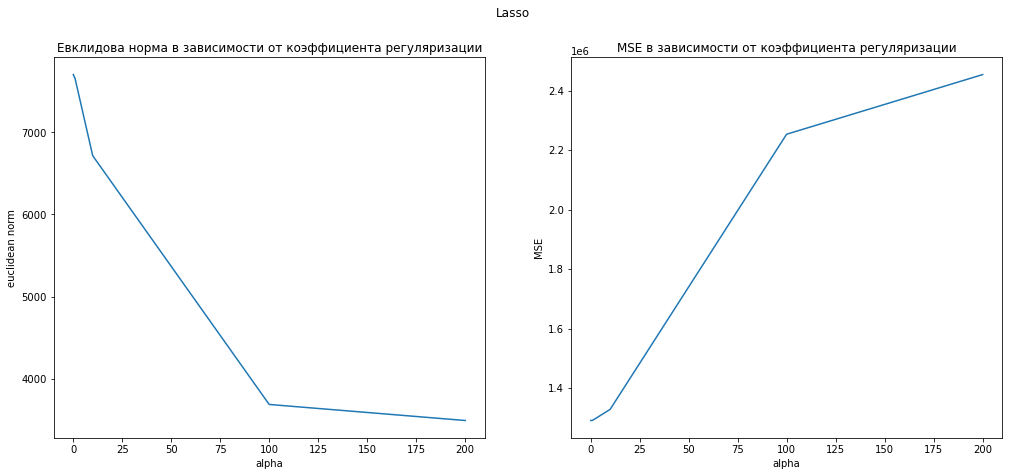

In [213]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
fig.suptitle('Lasso')
ax[0].plot(alphas, euclid_coefs)
ax[0].set_title("Евклидова норма в зависимости от коэффициента регуляризации")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("euclidean norm")

ax[1].plot(alphas, losses)
ax[1].set_title("MSE в зависимости от коэффициента регуляризации")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("MSE")

plt.show()

In [214]:
alphas = [0.1, 1, 10, 100, 200]
euclid_coefs = []
losses = []
for a in alphas:
    regression = Ridge(alpha=a)
    regression.fit(x_train, y_train)
    y_pred = regression.predict(x_train)
    euclid_coefs.append(np.linalg.norm(regression.coef_))
    losses.append(mean_squared_error(y_train, y_pred))

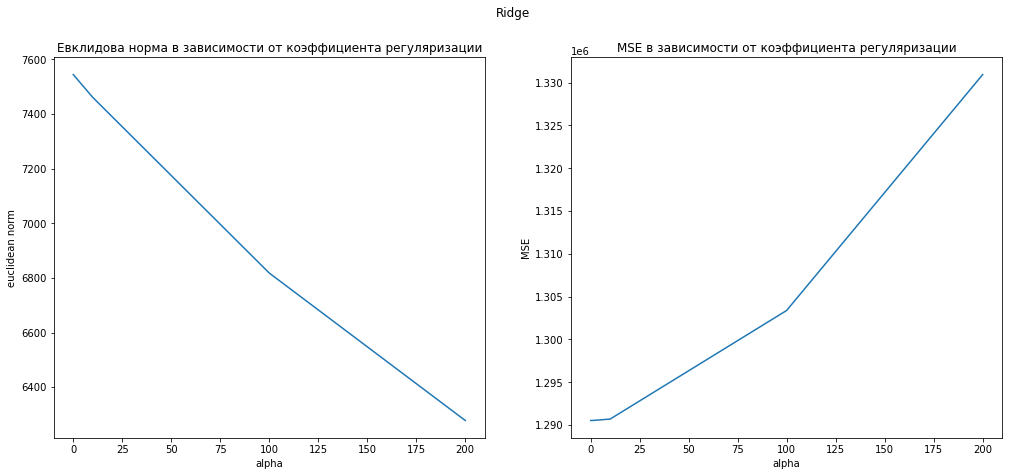

In [215]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
fig.suptitle('Ridge')
ax[0].plot(alphas, euclid_coefs)
ax[0].set_title("Евклидова норма в зависимости от коэффициента регуляризации")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("euclidean norm")

ax[1].plot(alphas, losses)
ax[1].set_title("MSE в зависимости от коэффициента регуляризации")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("MSE")

plt.show()

У Lasso график евклидовой нормы крутой и интервал у него от 7000 от 4000. То есть у Lasso, когда мы увеличиваем коэффициент регуяризации, евклидова норма коэффициентов падает очень сильно, а вот у Ridge остается примерно в том же масштабе.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [216]:
from sklearn. linear_model import LassoCV

In [217]:
regress = LassoCV(alphas=alphas, cv=5, n_jobs=-1, random_state=42)
regress.fit(x_train, y_train)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511839179.36678314, tolerance: 48476565.46527786
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, n_jobs=-1, random_state=42)

In [218]:
regress.mse_path_

array([[2534744.23552396, 2481568.40319477, 2460482.19916137,
        2383135.00341129, 2412550.60475102],
       [2333105.88226836, 2275033.87765734, 2272061.29469769,
        2182156.64825797, 2207551.91947459],
       [1378713.67671853, 1339116.01694246, 1360617.11417795,
        1285215.27576403, 1289407.83262559],
       [1334932.16010232, 1294433.07875999, 1335457.58827151,
        1258208.58621031, 1246601.96258563],
       [1333886.87397343, 1293215.24754554, 1346877.53232113,
        1258848.75174058, 1245323.61018103]])

In [219]:
for alpha, mse_mean in zip(regress.alphas_, np.mean(regress.mse_path_, axis=1)):
    print(f"{alpha}: {mse_mean}")

200.0: 2454496.0892084828
100.0: 2253981.924471189
10.0: 1330613.9832457122
1.0: 1293926.6751859526
0.1: 1295630.4031523434


Наибольшее качество дает Lasso при alpha=1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [220]:
best_reg = Lasso(alpha=1)
best_reg.fit(x_train, y_train)

for col, w in zip(X.columns, best_reg.coef_):
    print(f"{col}: {w}")

carat: 5290.023058165233
depth: -91.21206985164062
table: -62.20059021372677
x: -1061.663032989818
y: -3.485158036523411
z: -34.622011159675175
cut_Fair: -714.6165576238857
cut_Good: -137.72804960119623
cut_Ideal: 99.6422438062024
cut_Premium: 28.204147992733407
cut_Very Good: 0.0
color_D: 485.5811751017959
color_E: 272.7650590286295
color_F: 217.59770288921268
color_G: 0.0
color_H: -491.67058993259565
color_I: -962.7583362282113
color_J: -1858.4370474039222
clarity_I1: -4357.8901534223405
clarity_IF: 991.1654228768531
clarity_SI1: -679.8184002251347
clarity_SI2: -1643.2945059266556
clarity_VS1: 213.56339182069672
clarity_VS2: -93.88788229656409
clarity_VVS1: 650.4617276173424
clarity_VVS2: 582.0671739858834


Самые неинформативные оказались: cut_very good, y, z, cut_premium, color_G, clarity_VS2

Самые информативные: carat, x, clarity_IF, clarity_SI2, clarity_I1, color_J

Понятно, что вес бриллианта (carat) будет очень влиять на цену. Чем больше, тем дороже. Так же чистота алмаза (clarity) влияет на цену, причем в основном влияет либо самая худшая оценка чистоты (I1), либо самая лучшая (IF), либо средняя (SI2). Цвет J означает самый худший, что тоже информативно для цены.

color_G явлется средним между лучшим и худшим цветом, видимо, поэтому особого вклада в прайс не вносит. Интересно отметить, что качество среза сильно не влияет на цену, даже premium срез. Самый неинформативный это снова средний уровень среза из всех (very good).

**Что можно удалить?** cur_very good, color_G, clarity_VS2, y, z, cut_Premium

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [225]:
print(f"accuracy on train: {mean_squared_error(y_train, best_reg.predict(x_train))}")
print(f"accuracy on test: {mean_squared_error(y_test, best_reg.predict(x_test))}")

accuracy on train: 1290918.527641799
accuracy on test: 1244173.0045646098


In [226]:
regression = LinearRegression()
regression.fit(x_train, y_train)
print(f"accuracy on train: {mean_squared_error(y_train, regression.predict(x_train))}")
print(f"accuracy on test: {mean_squared_error(y_test, regression.predict(x_test))}")

accuracy on train: 1290544.8237034986
accuracy on test: 1244758.0263374413


In [224]:
mean_squared_error(y_test, regression.predict(x_test)) - mean_squared_error(y_test, best_reg.predict(x_test))

585.0217728314456

Лучше оказалась модель Lasso(alpha=1). Лучше потому, что регуляризация смогла занулить некоторые признаки, которые дают лишний шум, а так же уменьшить слишком большие коэффициенты. Регуляризация так же противодействует переобучению, так что его у нас тоже не случилось. Само переобучение можно заметить даже на тренировочной выборке, хоть у линейной регресии MSE ниже на тренировочной, на тестовой все оказалось наоборот.